# Redshift Data of DESIJ0201-2739

Author: Anowar Shajib, S M Rafee Adnan

## Load data

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
data, header = fits.getdata("DESIJ0201-2739_F140W_drz_sci.fits", header=True)

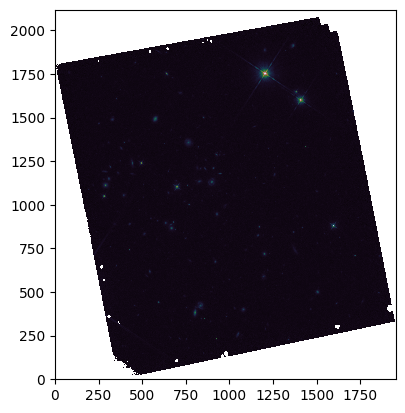

In [3]:
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

In [2]:
FILENAME = "photo_z_DESIJ0201-2739.csv"  # need to be changed for each cluster file
data_legacy = pd.read_csv(FILENAME, delimiter=",")
data_legacy.head()

,_r,id,RAJ2000,DEJ2000,release,brickid,objid,type,pstar,gmmcomp,zphot,e_zphot,fclean,fqual
0,0.007545,8000176705005209,30.439850,-27.668919,8000,176705,5209,REX,0.054,R5,0.828,0.402,1,0
1,0.006878,8000176705005210,30.439518,-27.668308,8000,176705,5210,PSF,0.028,P9,1.549,0.592,1,0
2,0.006955,8000176705005219,30.437571,-27.668622,8000,176705,5219,REX,0.000,R5,1.235,0.341,1,1
3,0.007094,8000176705005240,30.441860,-27.667618,8000,176705,5240,DEV,0.240,D0,0.911,0.040,1,1
4,0.006275,8000176705005241,30.441542,-27.666821,8000,176705,5241,PSF,0.965,P2,0.490,0.256,1,0


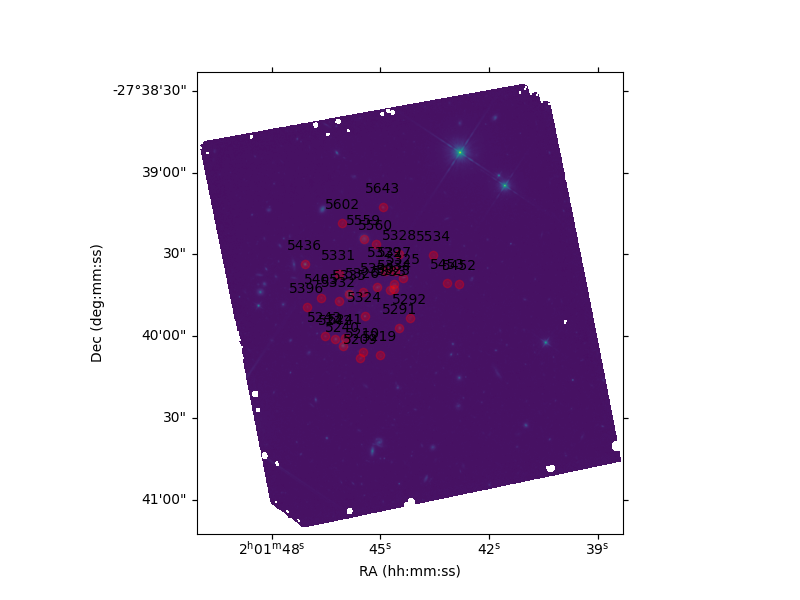

In [5]:
%matplotlib widget
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

In [6]:
# In degrees
center_x, center_y = 30.4365000, -27.6616667  # RA 02:01:45 DEC -27:39:42
radii = 15  # in arcsec
radii_deg = radii / 3600

x_upper, y_upper = center_x + radii_deg, center_y + radii_deg
x_lower, y_lower = center_x - radii_deg, center_y - radii_deg

x_limit_upper, y_limit_upper = wcs.all_world2pix(x_upper, y_upper, 0)
x_limit_lower, y_limit_lower = wcs.all_world2pix(x_lower, y_lower, 0)

print(x_limit_upper, x_limit_lower)

715.284754334285 1047.4312410573384


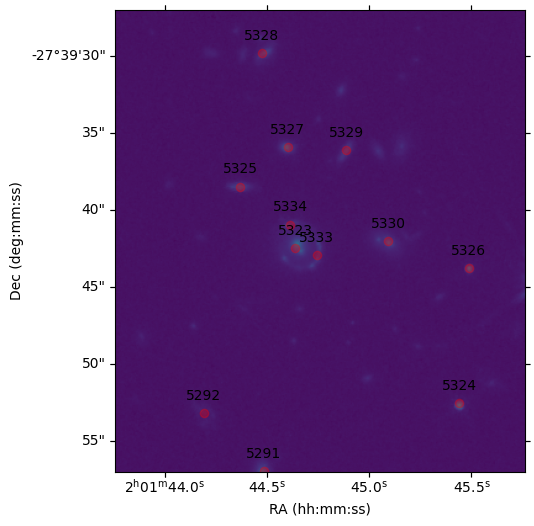

In [8]:
%matplotlib inline

wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

In [26]:
data_legacy.sort_values(by="objid")

# central deflector
central_deflector_id = 5323
object_ids = [central_deflector_id,
              5333, 5334, 5325, 5330, 5327, 5329, 5328, 5326]  

columns_to_drop = [
    "id",
    "RAJ2000",
    "DEJ2000",
    "release",
    "brickid",
]  # List of column names to drop
data_legacy_dropped = data_legacy.drop(columns=columns_to_drop)

selected_data_legacy = data_legacy_dropped[
    data_legacy_dropped["objid"].isin(object_ids)
]
selected_data_legacy.set_index("objid", inplace=True)

print(selected_data_legacy)

             _r type  pstar gmmcomp  zphot  e_zphot  fclean  fqual
objid                                                             
5323   0.001338  DEV  0.009      D8  0.747    0.065       0      0
5325   0.002526  EXP  0.003      E1  0.515    0.092       1      1
5326   0.001859  PSF  0.360      P2  0.607    0.086       0      0
5327   0.002240  REX  0.005      R6  0.870    0.065       1      1
5328   0.003898  EXP  0.001      E6  1.007    0.155       1      1
5329   0.001682  REX  0.062      R0  0.859    0.196       1      1
5330   0.000342  EXP  0.003      E7  0.976    0.120       0      0
5333   0.000984  EXP  0.114      E1  0.452    0.321       0      0
5334   0.001452  EXP  0.006      E5  0.718    0.436       0      0


## Save the Redshift data to the YAML file

In [27]:
# Existing YAML file with other parameters
existing_yaml_file = "DESIJ0201-2739_point_estimates.yml"

# Variables to include in the YAML file
z_phot = selected_data_legacy.loc[central_deflector_id,'zphot']
e_zphot = selected_data_legacy.loc[central_deflector_id,'e_zphot']

environment_variables = {
    "z_phot": [z_phot, e_zphot]
}

# make all the numpy variales to float
environment_variables = {
    key: [float(item) for item in value] if isinstance(value, list) else float(value)
    for key, value in environment_variables.items()
}

# Load existing YAML content if the file exists
existing_content = {}
try:
    with open(existing_yaml_file, "r") as file:
        existing_content = yaml.safe_load(file)
except FileNotFoundError:
    pass

# Update the existing content with new variables
existing_content.update(environment_variables)

# Write the updated content back to the YAML file
with open(existing_yaml_file, "w") as file:
    yaml.dump(existing_content, file, default_flow_style=False)